# Entree Task: Implementing Your Own Neural Networks from Scratch

In [93]:
import math
import numpy as np
from matplotlib import pyplot as plt # for graphics

## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [56]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        
        #1
        self.stored_X = X
        
        #2 
        return X @ self.W
        
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        
        #1
        # calculate "(partial L over partial Y = Y_grad) * "(Partial Y over partial W )"
        self.W_grad = self.stored_X.T @ Y_grad 
        
        #2
        # calculate derrivative of the loss function "partial L over partial Y" = 2(Y^ - Y)
        return Y_grad @ self.W.T
        
        ##########  Code end   ##########

## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [57]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[ 0.33865847 -0.36834135  1.68568181]]
Numerical gradient: [[ 0.33865847 -0.36834135  1.68568181]]
Error:  3.829436767688321e-12
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [54]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        #1
        shape_X = np.zeros((X.shape[0], X.shape[1]))
        func = lambda x: max(0, x)
        Y = np.array(list(map(func, X.flatten()))).reshape((shape_X.shape[0], shape_X.shape[1]))

        #2
        self.stored_X = X
        self.stored_X.reshape((shape_X.shape[0], shape_X.shape[1]))
        
        
        return Y

        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########
        
        #1
        def grad_relu(x):
            if x > 0:
                return 1
            else:
                return 0
        
        shape_stored_X = np.zeros((self.stored_X.shape[0], self.stored_X.shape[1]))
        
        func = lambda x: grad_relu(x)
        grad_relu_X = np.array(list(map(func, self.stored_X.flatten())))
        grad_relu_X_2D = grad_relu_X.reshape(shape_stored_X.shape[0], shape_stored_X.shape[1])
    
        return grad_relu_X_2D * Y_grad

        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [55]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.4833622  0.60281078 0.64823861]]
Numerical gradient: [[0.4833622  0.60281078 0.64823861]]
Error:  4.640504647213106e-11
Correct backward. Congratulations!


## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [64]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########
        
        
        #1
        self.stored_diff = prediction - groundtruth
        
        #2
        MSE_loss = np.sum(np.square(self.stored_diff)) / prediction.size
        
        return MSE_loss

        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        
        #1
        MSE_grad_mtx = np.zeros((self.stored_diff.shape[0], self.stored_diff.shape[1]))
        
        for i in range (0, MSE_grad_mtx.shape[0]):
            for j in range(0, MSE_grad_mtx.shape[1]):
                MSE_grad_mtx[i, j] = 2*(self.stored_diff[i,j]) / MSE_grad_mtx.size
        
        return MSE_grad_mtx
        
        ##########  Code end   ##########

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [44]:
class Network:
    def __init__(self, layers_arch):
        '''
        /*  TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
        ########## Code start  ##########
        
        #1
        self.layers = []
        for j in range(0, len(layers_arch)):
            if layers_arch[j][0] == "Linear":
                self.layers.append(LinearLayer(layers_arch[j][1][0], layers_arch[j][1][1]))
            elif layers_arch[j][0] == "ReLU":
                self.layers.append(ReLU())
                
                
        ##########  Code end   ##########
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        ########## Code start  ##########
        #1
        for i in range(0, len(self.layers)):
            if i == 0:
                out_layers = self.layers[i].forward(X)
            else:
                out_layers = self.layers[i].forward(out_layers)
        return out_layers

        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * TODO: propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.

         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
        ########## Code start  ##########
        #1
        for i in range(len(self.layers) -1, -1, -1):
            if i == (len(self.layers) -1):
                out_layers = self.layers[i].backward(Y_grad)
            else:
                out_layers = self.layers[i].backward(out_layers)
        return out_layers

    
        ##########  Code end   ##########

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [97]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 3e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
        
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        x = np.zeros((self.max_epoch, 1))
        y = np.zeros((self.max_epoch, 1))
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)
            x[i] = i
            y[i] = test_loss
        plt.figure()
        plt.title("Regression Network Test Loss Converging to Zero")
        plt.scatter(x, y)
            


Epoch:  1 / 200  | Train loss:  4.030777015886711  | Test loss :  3.87269047478234
Epoch:  2 / 200  | Train loss:  3.8030717028655467  | Test loss :  3.6544790256993656
Epoch:  3 / 200  | Train loss:  3.5914920025953405  | Test loss :  3.4512386678888607
Epoch:  4 / 200  | Train loss:  3.3940071156969904  | Test loss :  3.2611344070781803
Epoch:  5 / 200  | Train loss:  3.2089321986774095  | Test loss :  3.0826410612519783
Epoch:  6 / 200  | Train loss:  3.0348648888759038  | Test loss :  2.914487377696479
Epoch:  7 / 200  | Train loss:  2.8706350688126228  | Test loss :  2.755611553276998
Epoch:  8 / 200  | Train loss:  2.715264684642906  | Test loss :  2.6051254583305576
Epoch:  9 / 200  | Train loss:  2.56793527099886  | Test loss :  2.4622855641610126
Epoch:  10 / 200  | Train loss:  2.427961435877007  | Test loss :  2.3264690797558645
Epoch:  11 / 200  | Train loss:  2.2947689961873365  | Test loss :  2.19715417298586
Epoch:  12 / 200  | Train loss:  2.16787677559363  | Test loss 

Epoch:  98 / 200  | Train loss:  0.12594218050865832  | Test loss :  0.10921638560340131
Epoch:  99 / 200  | Train loss:  0.12588676178815839  | Test loss :  0.10917357069257524
Epoch:  100 / 200  | Train loss:  0.12583729381537057  | Test loss :  0.1091358444738066
Epoch:  101 / 200  | Train loss:  0.12579314211897874  | Test loss :  0.10910263685973005
Epoch:  102 / 200  | Train loss:  0.12575373912121315  | Test loss :  0.1090734394283794
Epoch:  103 / 200  | Train loss:  0.12571857720631255  | Test loss :  0.10904779894123241
Epoch:  104 / 200  | Train loss:  0.12568720248800222  | Test loss :  0.10902531152104025
Epoch:  105 / 200  | Train loss:  0.12565920920854493  | Test loss :  0.10900561742527244
Epoch:  106 / 200  | Train loss:  0.12563423470794072  | Test loss :  0.10898839635679383
Epoch:  107 / 200  | Train loss:  0.12561195490741492  | Test loss :  0.10897336325872792
Epoch:  108 / 200  | Train loss:  0.12559208025645846  | Test loss :  0.10896026454537068
Epoch:  109 / 

Epoch:  192 / 200  | Train loss:  0.12542813115521118  | Test loss :  0.10889989839884805
Epoch:  193 / 200  | Train loss:  0.12542812938163814  | Test loss :  0.10889993810656878
Epoch:  194 / 200  | Train loss:  0.12542812776489698  | Test loss :  0.10889997563482826
Epoch:  195 / 200  | Train loss:  0.12542812628992764  | Test loss :  0.10890001110032006
Epoch:  196 / 200  | Train loss:  0.12542812494319888  | Test loss :  0.10890004461381793
Epoch:  197 / 200  | Train loss:  0.12542812371254816  | Test loss :  0.10890007628043864
Epoch:  198 / 200  | Train loss:  0.12542812258703787  | Test loss :  0.10890010619989741
Epoch:  199 / 200  | Train loss:  0.12542812155682762  | Test loss :  0.10890013446675585
Epoch:  200 / 200  | Train loss:  0.1254281206130596  | Test loss :  0.10890016117066213


0.10890016117066213

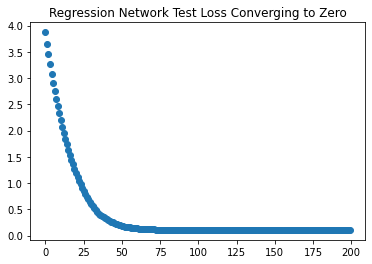

In [98]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [59]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    ########## Code start  ##########
    hot = np.zeros((labels.size, classes))
    
    for i in range (0, labels.size - 1):
        hot[i][labels[i]] = 1
        
    return hot
    ##########  Code end   ##########

In [101]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):        
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Code end   ##########
        
        return loss / n_loop

    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy

    def Train(self):
        self.dataloader()
        x = np.zeros((self.max_epoch, 1))
        y = np.zeros((self.max_epoch, 1))
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuray = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuray)
            x[i] = i
            y[i] = accuray
        plt.figure()
        plt.title("Classification Network Accuracy vs. Epoch")
        plt.scatter(x, y)



## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

Epoch:  1 / 200  | Train loss:  0.18642419734127424  | Test Accuracy :  0.1
Epoch:  2 / 200  | Train loss:  0.14486545874801454  | Test Accuracy :  0.155
Epoch:  3 / 200  | Train loss:  0.1289675991860444  | Test Accuracy :  0.205
Epoch:  4 / 200  | Train loss:  0.11745554865987333  | Test Accuracy :  0.27
Epoch:  5 / 200  | Train loss:  0.10875800147104996  | Test Accuracy :  0.33
Epoch:  6 / 200  | Train loss:  0.10195989232592274  | Test Accuracy :  0.365
Epoch:  7 / 200  | Train loss:  0.09648805851834474  | Test Accuracy :  0.4
Epoch:  8 / 200  | Train loss:  0.09195942462554793  | Test Accuracy :  0.445
Epoch:  9 / 200  | Train loss:  0.08814779851081456  | Test Accuracy :  0.47
Epoch:  10 / 200  | Train loss:  0.08488353302653616  | Test Accuracy :  0.51
Epoch:  11 / 200  | Train loss:  0.08204846499224552  | Test Accuracy :  0.53
Epoch:  12 / 200  | Train loss:  0.07954080539056345  | Test Accuracy :  0.54
Epoch:  13 / 200  | Train loss:  0.07730517377895373  | Test Accuracy : 

Epoch:  106 / 200  | Train loss:  0.03452610446573466  | Test Accuracy :  0.775
Epoch:  107 / 200  | Train loss:  0.03437624549719899  | Test Accuracy :  0.78
Epoch:  108 / 200  | Train loss:  0.034227592557169416  | Test Accuracy :  0.78
Epoch:  109 / 200  | Train loss:  0.034081484013729006  | Test Accuracy :  0.78
Epoch:  110 / 200  | Train loss:  0.033936700868495887  | Test Accuracy :  0.785
Epoch:  111 / 200  | Train loss:  0.033793085282482  | Test Accuracy :  0.785
Epoch:  112 / 200  | Train loss:  0.033652587286629884  | Test Accuracy :  0.785
Epoch:  113 / 200  | Train loss:  0.033512781567944884  | Test Accuracy :  0.785
Epoch:  114 / 200  | Train loss:  0.033374627363232934  | Test Accuracy :  0.785
Epoch:  115 / 200  | Train loss:  0.033237734166356836  | Test Accuracy :  0.785
Epoch:  116 / 200  | Train loss:  0.03310264500409646  | Test Accuracy :  0.785
Epoch:  117 / 200  | Train loss:  0.03296841745513099  | Test Accuracy :  0.785
Epoch:  118 / 200  | Train loss:  0.03

0.81

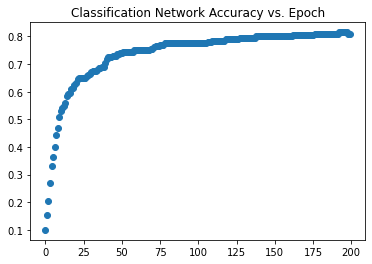

In [102]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()
cls.Test()

In [72]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 256)], ['ReLU'], ['Linear', (256, 256)], ['ReLU'], ['Linear', (256, 10)]]
# regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]

cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()
cls.Test()

Epoch:  1 / 200  | Train loss:  0.152835677185016  | Test Accuracy :  0.17
Epoch:  2 / 200  | Train loss:  0.11254809398824757  | Test Accuracy :  0.215
Epoch:  3 / 200  | Train loss:  0.10150156579022651  | Test Accuracy :  0.28
Epoch:  4 / 200  | Train loss:  0.09367512478927915  | Test Accuracy :  0.315
Epoch:  5 / 200  | Train loss:  0.08772090678990269  | Test Accuracy :  0.36
Epoch:  6 / 200  | Train loss:  0.08301416766091632  | Test Accuracy :  0.405
Epoch:  7 / 200  | Train loss:  0.07915150339816605  | Test Accuracy :  0.43
Epoch:  8 / 200  | Train loss:  0.07589744577366032  | Test Accuracy :  0.435
Epoch:  9 / 200  | Train loss:  0.07308122689227013  | Test Accuracy :  0.445
Epoch:  10 / 200  | Train loss:  0.0706301829368204  | Test Accuracy :  0.49
Epoch:  11 / 200  | Train loss:  0.0684593158031548  | Test Accuracy :  0.505
Epoch:  12 / 200  | Train loss:  0.06651084946837886  | Test Accuracy :  0.515
Epoch:  13 / 200  | Train loss:  0.0647520122036127  | Test Accuracy :

Epoch:  106 / 200  | Train loss:  0.026082528292379868  | Test Accuracy :  0.775
Epoch:  107 / 200  | Train loss:  0.025940796357139025  | Test Accuracy :  0.775
Epoch:  108 / 200  | Train loss:  0.02580094686378668  | Test Accuracy :  0.775
Epoch:  109 / 200  | Train loss:  0.025662888492805538  | Test Accuracy :  0.775
Epoch:  110 / 200  | Train loss:  0.025526518129806663  | Test Accuracy :  0.775
Epoch:  111 / 200  | Train loss:  0.0253911373284471  | Test Accuracy :  0.785
Epoch:  112 / 200  | Train loss:  0.02525819667029554  | Test Accuracy :  0.785
Epoch:  113 / 200  | Train loss:  0.025125695403920144  | Test Accuracy :  0.785
Epoch:  114 / 200  | Train loss:  0.024995706088351492  | Test Accuracy :  0.785
Epoch:  115 / 200  | Train loss:  0.02486750731010083  | Test Accuracy :  0.79
Epoch:  116 / 200  | Train loss:  0.02474065106077914  | Test Accuracy :  0.795
Epoch:  117 / 200  | Train loss:  0.024614651228047357  | Test Accuracy :  0.795
Epoch:  118 / 200  | Train loss:  0

0.82